# Python Final Programming Project 

By Lucia Garrigues and Ekaterine Jorjoliani

Dataset: https://www.kaggle.com/datasets/camnugent/california-housing-prices 

Literature: 
Initially featured in:
Pace, R. Kelley, and Ronald Barry. "Sparse spatial autoregressions." Statistics & Probability Letters 33.3 (1997)

It was encountered from:
Aurélien Géron's 'Hands-On Machine learning with Scikit-Learn and TensorFlow'

Purchase book: https://www.amazon.com/Hands-Machine-Learning-Scikit-Learn-TensorFlow/dp/1492032646

Pdf: https://powerunit-ju.com/wp-content/uploads/2021/04/Aurelien-Geron-Hands-On-Machine-Learning-with-Scikit-Learn-Keras-and-Tensorflow_-Concepts-Tools-and-Techniques-to-Build-Intelligent-Systems-OReilly-Media-2019.pdf

Summary: 
Aurélien Géron's book discusses deep learning for machine learning using Python frameworks Scikit-Learn and TensorFlow. The approach covers different techniques, progressing from simple linear regression to deep neural networks. The emphasis is on practical application, making it accessible for programmers with basic/minimal knowledge. Topics include exploring neural networks, using Scikit-Learn for end-to-end projects, and going into TensorFlow for building and training neural networks.

In [1]:
#search for the literature on this dataset and summarize the literature in your final project

In [2]:
#Read the dataset

import pandas as pd
df = pd.read_csv('housing.csv')

In [3]:
#Display first few columns of the dataset

df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
#Get information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
#Display number of missing values

print(df.isnull().sum())

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


In [6]:
#Handle the missing values

df.dropna(inplace=True)

In [7]:
#Find duplicates (if any)

print(df[df.duplicated()])

Empty DataFrame
Columns: [longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households, median_income, median_house_value, ocean_proximity]
Index: []


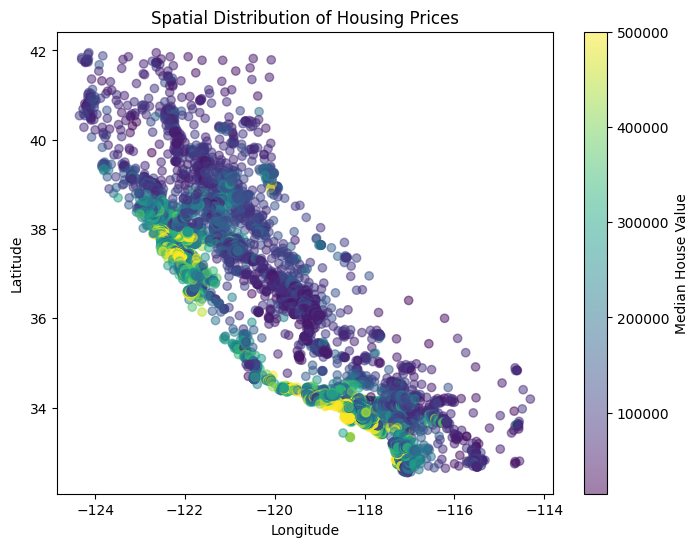

In [8]:
#Explore Spatial Patterns by using scatterplots

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(df['longitude'], df['latitude'], c=df['median_house_value'], cmap='viridis', alpha=0.5)
plt.colorbar(label='Median House Value')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Spatial Distribution of Housing Prices')
plt.show()

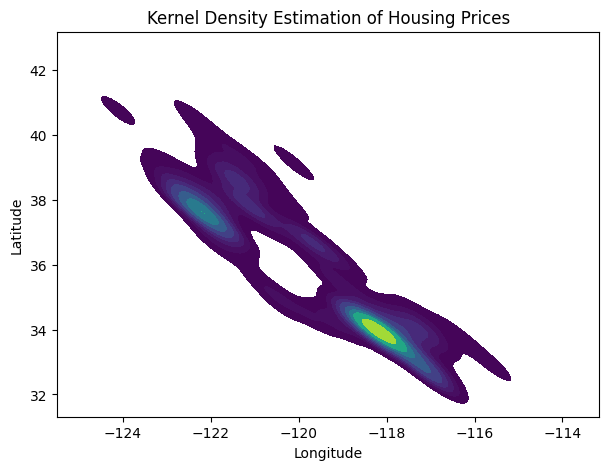

In [9]:
#Explore Spatial Trends by using density plot
import seaborn as sns

plt.figure(figsize=(7, 5))
sns.kdeplot(data=df, x='longitude', y='latitude', cmap='viridis', fill=True)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Kernel Density Estimation of Housing Prices')
plt.show()

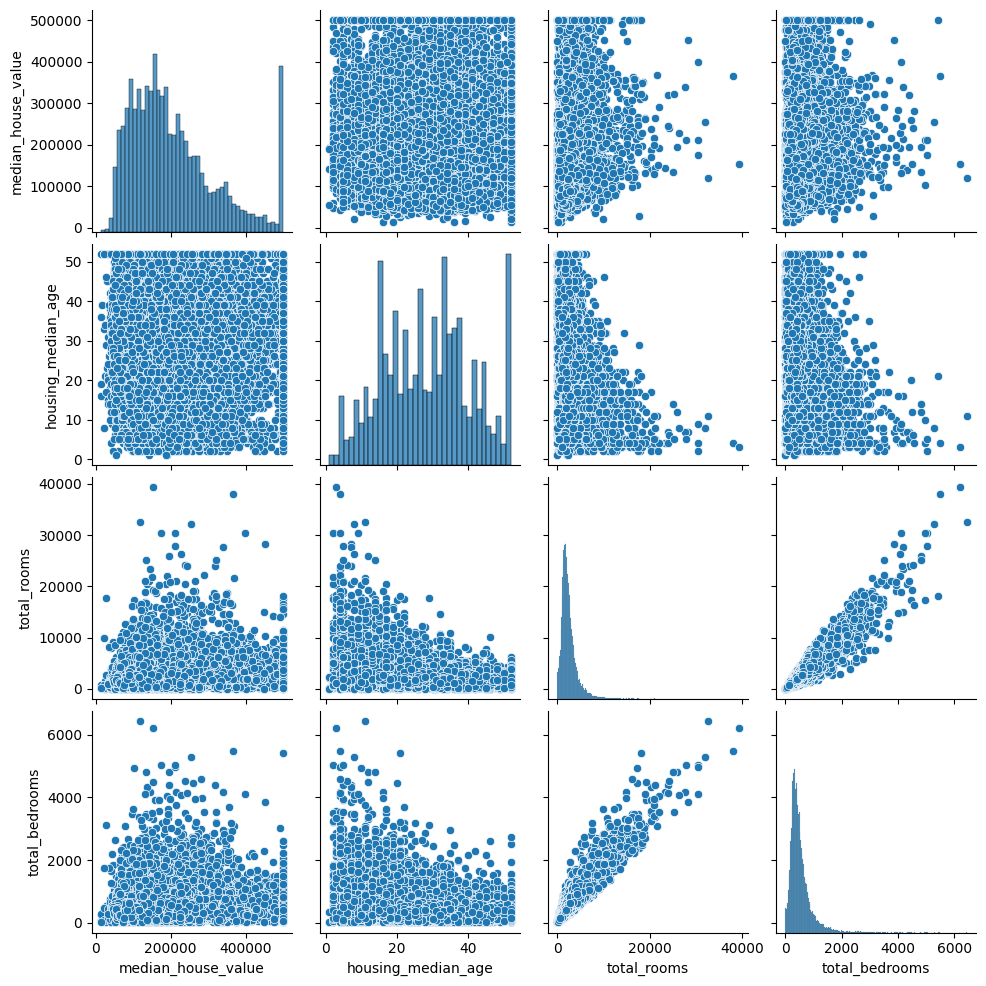

In [10]:
#Investigate housing characteristics

#Make a pairplot for multiple variables
sns.pairplot(df[['median_house_value', 'housing_median_age', 'total_rooms', 'total_bedrooms']])
plt.show()

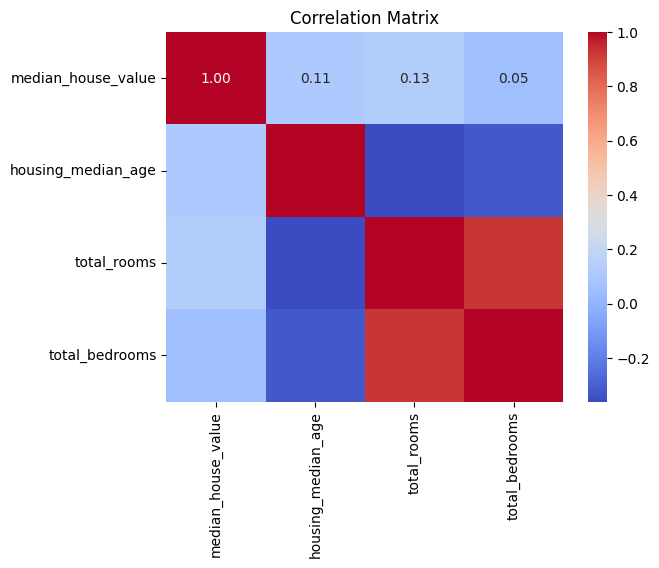

In [11]:
#Correlation matrix to check the correlation between variables
corr_matrix = df[['median_house_value', 'housing_median_age', 'total_rooms', 'total_bedrooms']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

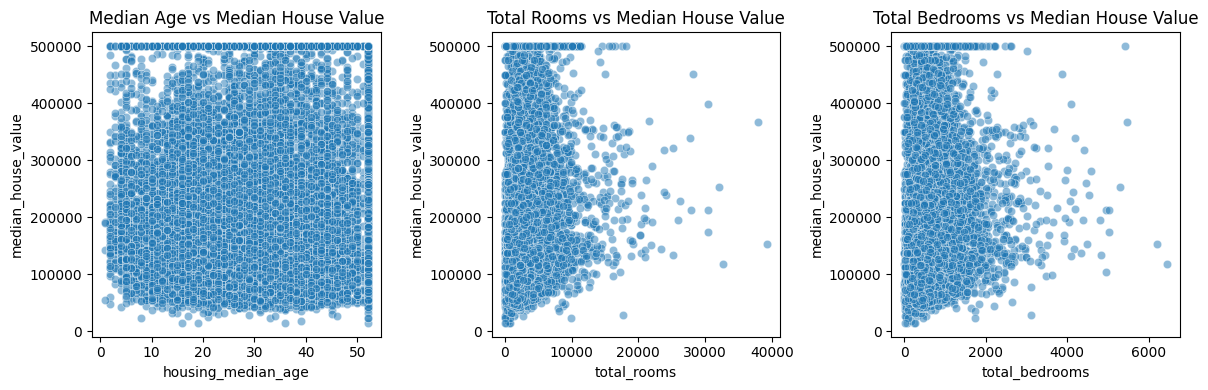

In [12]:
#Scatterplots for each two variables

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
sns.scatterplot(x='housing_median_age', y='median_house_value', data=df, alpha=0.5)
plt.title('Median Age vs Median House Value')

plt.subplot(1, 3, 2)
sns.scatterplot(x='total_rooms', y='median_house_value', data=df, alpha=0.5)
plt.title('Total Rooms vs Median House Value')

plt.subplot(1, 3, 3)
sns.scatterplot(x='total_bedrooms', y='median_house_value', data=df, alpha=0.5)
plt.title('Total Bedrooms vs Median House Value')

plt.tight_layout()
plt.show()

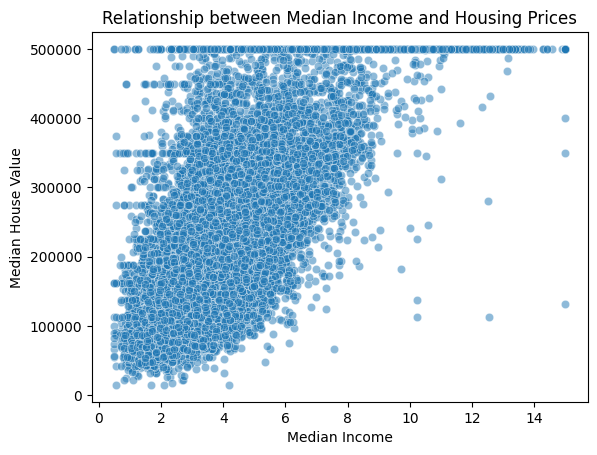

In [13]:
#Explore the relationship between income and housing prices

sns.scatterplot(x='median_income', y='median_house_value', data=df, alpha=0.5)
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.title('Relationship between Median Income and Housing Prices')
plt.show()

/var/folders/sm/1phs03r561j3srvbxh6xvtzm0000gn/T/ipykernel_54719/482287870.py:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data_for_correlation.corr()


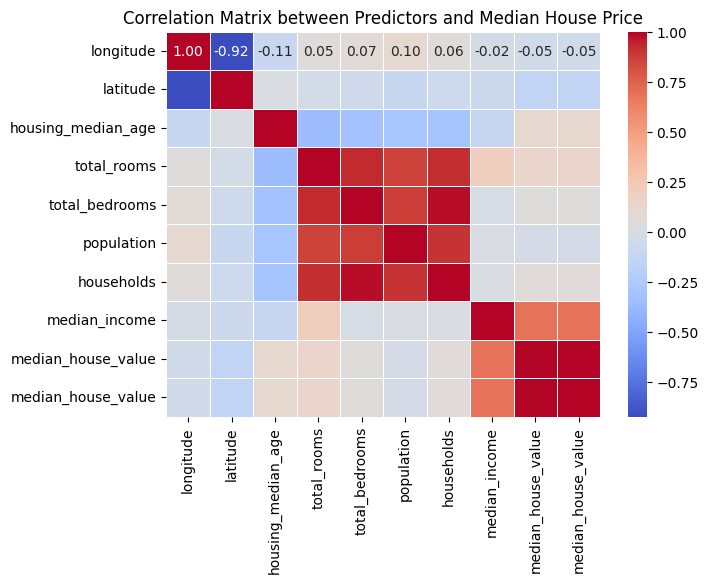

In [16]:
#Compare the correlation of each variable with the median house price

features = df[['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value', 'ocean_proximity']]
target = df['median_house_value']

data_for_correlation = pd.concat([features, target], axis=1)

correlation_matrix = data_for_correlation.corr()

plt.figure(figsize=(7, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix between Predictors and Median House Price')
plt.show()

In [17]:
#Calculate correlation coefficient between the variables

correlation = df['median_income'].corr(df['median_house_value'])
print(f'Correlation between Median Income and House Value: {correlation:.2f}')

Correlation between Median Income and House Value: 0.69


In [18]:
#Build a prediction model(Linear Regression)

X = df[['median_income']]
y = df['median_house_value']

In [19]:
#Split into training and testing

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [21]:
#Train the model
model.fit(X_train, y_train)

LinearRegression()

In [22]:
#Make predictions on the testing model
predictions = model.predict(X_test)
print(predictions)

[177965.11196678 232380.43879174 179631.01508986 ... 151815.86068889
 190515.75053317 142121.05604778]


In [23]:
#Evaluate the accuracy of the model

from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

Mean Squared Error: 7221011204.24
R-squared: 0.47


In [21]:
#Not a high accuracy

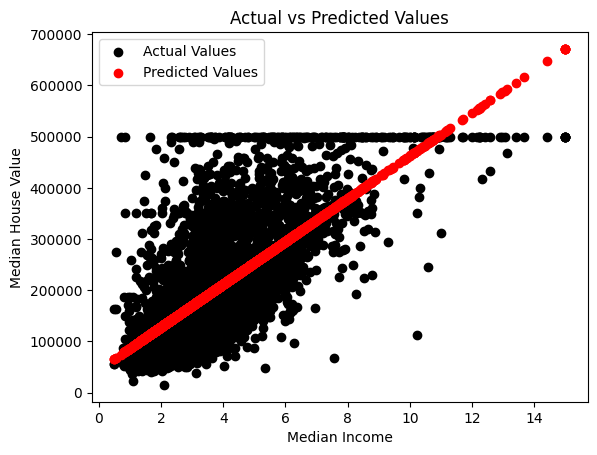

In [24]:
#Visualize the predictions

plt.scatter(X_test, y_test, color='black', label='Actual Values')
plt.scatter(X_test, predictions, color='red', label='Predicted Values')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()

In [25]:
#Use longitude and latitude to determine the city/area of each district
#Create a model, train/test, predict, see accuracy

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

features = df[['longitude', 'latitude']]
target = df['ocean_proximity']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

model = RandomForestClassifier()

model.fit(X_train, y_train)

predictions = model.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.99


In [ ]:
#Very good accuracy

In [26]:
print(predictions)

['NEAR OCEAN' 'INLAND' '<1H OCEAN' ... 'INLAND' 'INLAND' 'NEAR OCEAN']


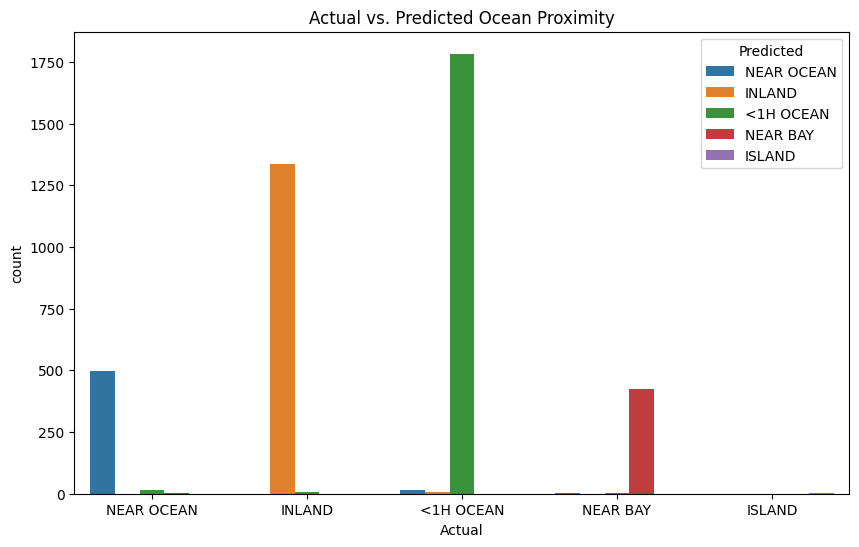

In [32]:
#Visualize actual vs predicted

df_results = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})

plt.figure(figsize=(10, 6))
sns.countplot(x='Actual', data=df_results, hue='Predicted')
plt.title('Actual vs. Predicted Ocean Proximity')
plt.show()

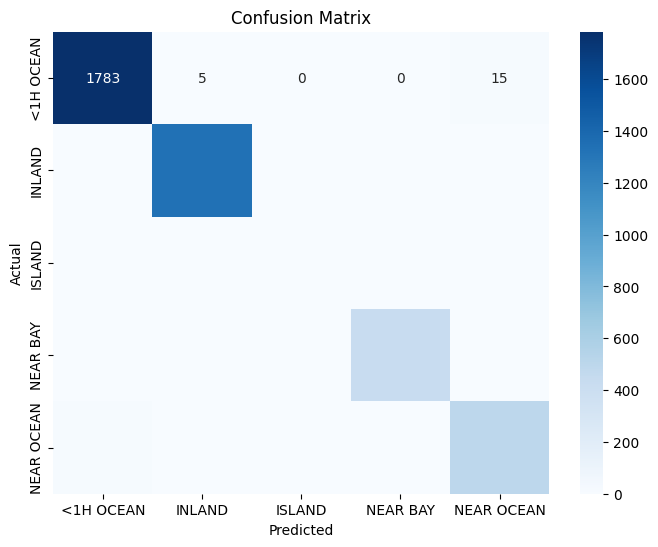

In [34]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(df_results['Actual'], df_results['Predicted'])

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()